In [37]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import  numpy as np 
import plotly.express as px

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')
from itables import show
#from itables import init_notebook_mode
#init_notebook_mode(all_interactive=True)
from icecream import ic

# Passo 1

> Utilizando a biblioteca de manipulação de dados, o Pandas, realize o upload da base de dados no Python para iniciar as análises. Ainda utilizando as ferramentas do Pandas, realize análises estatísticas descritivas sobre os dados, explorando todas as variáveis do modelo: variáveis qualitativas e quantitativas.

In [38]:
data: pd.DataFrame = pd.read_csv('../../data/cars.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     52 non-null     int64  
 1   brand                  52 non-null     object 
 2   model                  52 non-null     object 
 3   year                   52 non-null     int64  
 4   miles                  52 non-null     int64  
 5   city_mileage           52 non-null     int64  
 6   highway_mileage        52 non-null     int64  
 7   horsepower             52 non-null     int64  
 8   torque                 52 non-null     int64  
 9   engine_capacity_litre  52 non-null     float64
 10  fuel_capacity          52 non-null     float64
 11  num_cylinder           52 non-null     int64  
 12  num_seat               52 non-null     int64  
 13  num_owners             52 non-null     int64  
 14  price                  52 non-null     int64  
 15  link    

In [39]:
# modifica o tipo dos dados das colunas para melhor aproveitamento de memória e facilitar a análise
data['brand'] = data['brand'].astype('category')
data['model'] = data['model'].astype('category')
data['type'] = data['type'].astype('category')
data['engine_type'] = data['engine_type'].astype('category')
data['link'] = data['link'].astype('string')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     52 non-null     int64   
 1   brand                  52 non-null     category
 2   model                  52 non-null     category
 3   year                   52 non-null     int64   
 4   miles                  52 non-null     int64   
 5   city_mileage           52 non-null     int64   
 6   highway_mileage        52 non-null     int64   
 7   horsepower             52 non-null     int64   
 8   torque                 52 non-null     int64   
 9   engine_capacity_litre  52 non-null     float64 
 10  fuel_capacity          52 non-null     float64 
 11  num_cylinder           52 non-null     int64   
 12  num_seat               52 non-null     int64   
 13  num_owners             52 non-null     int64   
 14  price                  52 non-null     int64

In [40]:
data.isna().sum()

id                        0
brand                     0
model                     0
year                      0
miles                     0
city_mileage              0
highway_mileage           0
horsepower                0
torque                    0
engine_capacity_litre     0
fuel_capacity             0
num_cylinder              0
num_seat                  0
num_owners                0
price                     0
link                      0
condition                51
type                      0
doors                     0
wheel_drive               0
engine_type               0
speed_levels              1
front_headroom            0
front_legroom             0
rear_headroom             0
rear_legroom              0
service_records           0
dtype: int64

### Tratamento de valores NaN e eliminação de colunas sem poder preditivo


  

A coluna __speed_level__  possui um valor _NaN_. O carro de __id__ = _13_ é aquele que possui o  __speed_level__  = _NaN_. Uma característica importante do veículo é o fato de que ele possui __engine_type__ igual a _hybrid_gas_electric_. Neste caso, para pensarmos em como tratar o dado _NaN_, é razoável verificarmos quais outros veículos da base de dados possuem o mesmo tipo de __engine_type__. 

In [41]:
data.query("engine_type == 'hybrid_gas_electric'").T

0   \
id                                                                     3   
brand                                                          Chevrolet   
model                                                            Volt LT   
year                                                                2019   
miles                                                              27173   
city_mileage                                                          43   
highway_mileage                                                       42   
horsepower                                                           149   
torque                                                               294   
engine_capacity_litre                                                1.5   
fuel_capacity                                                        8.9   
num_cylinder                                                           4   
num_seat                                                               5   
num_owners                                                             3   
price                                                              25655   
link                   https://www.autotrader.com/cars-for-sale/vehic...   
condition                                                            NaN   
type                                                               sedan   
doors                                                                  4   
wheel_drive                                                            2   
engine_type                                          hybrid_gas_electric   
speed_levels                                                         6.0   
front_headroom                                                      37.8   
front_legroom                                                       42.1   
rear_headroom                                                       35.8   
rear_legroom                                                        34.7   
service_records                                                        4   

                                                                      7   \
id                                                                    13   
brand                                                              Honda   
model                                                            Clarity   
year                                                                2018   
miles                                                              29674   
city_mileage                                                          44   
highway_mileage                                                       40   
horsepower                                                           212   
torque                                                                99   
engine_capacity_litre                                                1.5   
fuel_capacity                                                        7.0   
num_cylinder                                                           4   
num_seat                                                               5   
num_owners                                                             1   
price                                                              26999   
link                   https://www.autotrader.com/cars-for-sale/vehic...   
condition                                                            NaN   
type                                                               sedan   
doors                                                                  4   
wheel_drive                                                            2   
engine_type                                          hybrid_gas_electric   
speed_levels                                                         NaN   
front_headroom                                                      39.1   
front_legroom                                                       42.2   
rear_headroom                            

Como podemos verificar, os outros carros da base que posssem o tipo de __engine_type__ igual a _hybrid_gas_electric__ tem o  __speed_level__  = _6.0_. Então iremos assumir o  __speed_level__  = _6.0_ para o veículo de __id__ = _13_.	

In [42]:
data['speed_levels'] = data['speed_levels'].replace({np.NAN:6.0})
data.iloc[7,:]


id                                                                      13
brand                                                                Honda
model                                                              Clarity
year                                                                  2018
miles                                                                29674
city_mileage                                                            44
highway_mileage                                                         40
horsepower                                                             212
torque                                                                  99
engine_capacity_litre                                                  1.5
fuel_capacity                                                          7.0
num_cylinder                                                             4
num_seat                                                                 5
num_owners                                                               1
price                                                                26999
link                     https://www.autotrader.com/cars-for-sale/vehic...
condition                                                              NaN
type                                                                 sedan
doors                                                                    4
wheel_drive                                                              2
engine_type                                            hybrid_gas_electric
speed_levels                                                           6.0
front_headroom                                                        39.1
front_legroom                                                         42.2
rear_headroom                                                         37.1
rear_legroom                                                          36.2
service_records                                                          2
Name: 7, dtype: object

In [43]:
data.describe().T

count          mean           std      min        25%  \
id                      52.0     31.365385     15.378912      3.0     18.750   
year                    52.0   2018.673077      1.396370   2014.0   2018.000   
miles                   52.0  33901.250000  22700.646139   5000.0  16454.750   
city_mileage            52.0     29.038462      5.947356     17.0     26.500   
highway_mileage         52.0     37.423077      4.136619     24.0     35.750   
horsepower              52.0    176.865385     33.793507    143.0    152.000   
torque                  52.0    177.923077     47.256433     99.0    138.000   
engine_capacity_litre   52.0      1.832692      0.379743      1.4      1.500   
fuel_capacity           52.0     14.232692      2.603973      7.0     12.400   
num_cylinder            52.0      4.038462      0.277350      4.0      4.000   
num_seat                52.0      5.000000      0.000000      5.0      5.000   
num_owners              52.0      1.346154      0.622601      1.0      1.000   
price                   52.0  21763.423077   3532.455322  13590.0  19519.000   
condition                1.0      4.000000           NaN      4.0      4.000   
doors                   52.0      4.000000      0.000000      4.0      4.000   
wheel_drive             52.0      2.153846      0.538138      2.0      2.000   
speed_levels            52.0      6.307692      0.755073      6.0      6.000   
front_headroom          52.0     38.680769      0.919087     37.5     37.725   
front_legroom           52.0     42.467308      1.045198     41.1     42.200   
rear_headroom           52.0     37.238462      0.444202     35.8     37.075   
rear_legroom            52.0     37.632692      1.604249     33.2     37.175   
service_records         52.0      7.326923      4.714272      1.0      4.000   

                           50%       75%      max  
id                        31.5     44.25     57.0  
year                    2019.0   2019.25   2022.0  
miles                  27448.5  42442.00  97027.0  
city_mileage              30.0     30.00     55.0  
highway_mileage           38.0     40.00     49.0  
horsepower               159.5    192.00    288.0  
torque                   181.0    192.00    294.0  
engine_capacity_litre      2.0      2.00      3.5  
fuel_capacity             13.6     15.05     19.0  
num_cylinder               4.0      4.00      6.0  
num_seat                   5.0      5.00      5.0  
num_owners                 1.0      2.00      3.0  
price                  21998.5  22996.00  33777.0  
condition                  4.0      4.00      4.0  
doors                      4.0      4.00      4.0  
wheel_drive                2.0      2.00      4.0  
speed_levels               6.0      6.00      9.0  
front_headroom            38.5     39.30     40.4  
front_legroom             42.3     42.40     45.5  
rear_headroom             37.2     37.50     38.0  
rear_legroom              37.4     38.30     40.4  
service_records            6.0     10.00     26.0

- A coluna __condition__ possui somente um valor não-nulo. A alternativa à eliminação seria a interpolação ou repetição de valores, o que não iria auxiliar a elaboração do modelo.

- A coluna __link__ corresponde ao endereço do carro na página das empresas. Logo, não parece ter qualquer valor preditivo e também deverá ser eliminada.

- A coluna __doors__ corresponde à quantidade de portas dos carros.  Como todos os carros da base possuem 4 portas, a coluna não irá auxiliar a elaboração do modelo.

- A coluna __num_seat__ corresponde ao número de assentos dos carros.  Como todos os carros da base possuem 5 assentos, a coluna não irá auxiliar a elaboração do modelo.

- A coluna __id__ ser somente como número identificador de cada carro, logo a coluna pode ser eliminada.

In [44]:
data: pd.DataFrame = data.drop(columns=['condition','link','doors','id', 'num_seat']) # removendo as colunas 'condition' e 'link'

## Análise das variáveis qualitativas 

In [45]:
# dataframe que contém somente as colunas com dados qualitativos
data_quali: pd.DataFrame = data.select_dtypes(include=['category'])
data_quali.value_counts()

brand       model       type   engine_type        
Honda       Civic       sedan  gas                    14
            Accord      sedan  gas                     7
Volkswagen  Jetta       sedan  gas                     7
Hyundai     Elantra SE  sedan  gas                     4
Volkswagen  Passat      sedan  gas                     4
Hyundai     Sonata      sedan  gas                     3
Ford        Fusion      sedan  gas                     3
Subaru      Impreza     sedan  gas                     2
Chevrolet   Malibu      sedan  gas                     2
            Volt LT     sedan  hybrid_gas_electric     1
Ford        Focus       sedan  gas                     1
            Taurus      sedan  gas                     1
Honda       Insight     sedan  hybrid_gas_electric     1
            Clarity     sedan  hybrid_gas_electric     1
Subaru      Legacy      sedan  gas                     1
Name: count, dtype: int64

In [46]:
# desenha os gráficos de barras na forma de subplots
def plotly_subplots_bar(nrows, ncols, subplot_titles, data_frame)-> None:

    fig = make_subplots(rows=nrows, cols=ncols, subplot_titles=subplot_titles)

    i=1
    j=1
    for col in data_frame.columns:
        fig.add_trace(go.Bar(x=data_frame[col].value_counts().index, 
                            y=data_frame[col].value_counts().values, 
                            name=col), 
                            row=i, col=j)
        fig.update_yaxes(title_text='quantidade')
        
        if  i < nrows:
            i+=1
            if j< ncols:
                j+=1
            else:
                j = 1
        else:
            i = 1
        
        

    fig.update_layout(height=750, width=750,
                    title_text="Variáveis qualitativas da base de dados")

    fig.show()

plotly_subplots_bar(2,2,['marca', 'tipo', 'tipo de motor', 'modelo'], data_quali)

Observações sobre as variáveis qualitativas:
- __brand__:  A marca é um atributo que descreve a origem ou o fabricante do produto. Neste caso, as marcas correspondem a 6 categorias: 'Chevrolet', 'Hyundai', 'Ford', 'Honda', 'Subaru', 'Volkswagen'. A marca mais frequente na base de dados é 'Honda', com 23 ocorrências, seguida por 'Volkswagen', com 11 ocorrências. As marcas com a menor quantidade de dados na base são 'Subaru' e Chevrolet, ambas com 3 ocorrências.
- __type__: O único tipo de carro presente na base o 'sedan'.
- __engine_type__: existem dois tipos de motor na base de dados, quais sejam: 'gas' (49 veículos) e 'hybrid_gas_eletric' (3 veículos). 
- __model__:  Existem 15 modelos de veículos na base de dados, sendo mais frequente o 'Civic' (14 carros) e os menos frequentes, com apenas 1 ocorrência são: 'Focus', 'Clarity', 'Legacy', 'Taurus' e 'Volt LT'.


### Transformação das variáveis qualitativas em variáveis _dummy_ (one-hot encoding)

Considerando que _type_ é uma variável que apresenta somente uma categoria, ela não será considerada no modelo. Logo, somente as outras variáveis serão submetidas ao _encoding_. Mesmo não sendo o mais eficiente em termos de alocação de espaço em memória, como ele é de fácil compreensão e a base de dados é pequena, entendemos ser conveniente utilizar este método.

In [47]:
d_engine_type = pd.get_dummies(data_quali[['engine_type']], drop_first=True, dtype=float)
d_brand = pd.get_dummies(data_quali[['brand']], drop_first=True, dtype=float)
d_model = pd.get_dummies(data_quali[['model']], drop_first=True, dtype=float)

In [48]:
d_model

model_Civic  model_Clarity  model_Elantra SE  model_Focus  model_Fusion  \
0           0.0            0.0               0.0          0.0           0.0   
1           0.0            0.0               1.0          0.0           0.0   
2           0.0            0.0               0.0          1.0           0.0   
3           1.0            0.0               0.0          0.0           0.0   
4           0.0            0.0               1.0          0.0           0.0   
5           1.0            0.0               0.0          0.0           0.0   
6           0.0            0.0               0.0          0.0           0.0   
7           0.0            1.0               0.0          0.0           0.0   
8           0.0            0.0               0.0          0.0           0.0   
9           0.0            0.0               0.0          0.0           0.0   
10          1.0            0.0               0.0          0.0           0.0   
11          1.0            0.0               0.0          0.0           0.0   
12          1.0            0.0               0.0          0.0           0.0   
13          0.0            0.0               0.0          0.0           0.0   
14          1.0            0.0               0.0          0.0           0.0   
15          0.0            0.0               0.0          0.0           0.0   
16          0.0            0.0               0.0          0.0           0.0   
17          1.0            0.0               0.0          0.0           0.0   
18          0.0            0.0               0.0          0.0           0.0   
19          0.0            0.0               0.0          0.0           0.0   
20          0.0            0.0               0.0          0.0           0.0   
21          0.0            0.0               0.0          0.0           1.0   
22          0.0            0.0               0.0          0.0           0.0   
23          0.0            0.0               0.0          0.0           0.0   
24          0.0            0.0               0.0          0.0           0.0   
25          0.0            0.0               0.0          0.0           0.0   
26          0.0            0.0               0.0          0.0           0.0   
27          1.0            0.0               0.0          0.0           0.0   
28          0.0            0.0               0.0          0.0           0.0   
29          1.0            0.0               0.0          0.0           0.0   
30          0.0            0.0               0.0          0.0           0.0   
31          1.0            0.0               0.0          0.0           0.0   
32          0.0            0.0               0.0          0.0           0.0   
33          0.0            0.0               0.0          0.0           0.0   
34          0.0            0.0               0.0          0.0           0.0   
35          1.0            0.0               0.0          0.0           0.0   
36          0.0            0.0               0.0          0.0           0.0   
37          0.0            0.0               0.0          0.0           0.0   
38          0.0            0.0               0.0          0.0           0.0   
39          0.0            0.0               0.0          0.0           1.0   
40          0.0            0.0               0.0          0.0           0.0   
41          1.0            0.0               0.0          0.0           0.0   
42          0.0            0.0               0.0          0.0           0.0   
43          1.0            0.0               0.0          0.0           0.0   
44          0.0            0.0               0.0          0.0           0.0   
45          0.0            0.0               0.0          0.0           0.0   
46          1.0            0.0               0.0          0.0           0.0   
47          0.0            0.0               0.0          0.0           0.0   
48          0.0            0.0               1.0          0.0           0.0   
49          0.0            0.0               0.0      

In [49]:
d_brand

brand_Ford  brand_Honda  brand_Hyundai  brand_Subaru  brand_Volkswagen
0          0.0          0.0            0.0           0.0               0.0
1          0.0          0.0            1.0           0.0               0.0
2          1.0          0.0            0.0           0.0               0.0
3          0.0          1.0            0.0           0.0               0.0
4          0.0          0.0            1.0           0.0               0.0
5          0.0          1.0            0.0           0.0               0.0
6          0.0          0.0            0.0           1.0               0.0
7          0.0          1.0            0.0           0.0               0.0
8          0.0          0.0            0.0           0.0               1.0
9          0.0          0.0            0.0           0.0               1.0
10         0.0          1.0            0.0           0.0               0.0
11         0.0          1.0            0.0           0.0               0.0
12         0.0          1.0            0.0           0.0               0.0
13         0.0          1.0            0.0           0.0               0.0
14         0.0          1.0            0.0           0.0               0.0
15         0.0          0.0            0.0           1.0               0.0
16         0.0          1.0            0.0           0.0               0.0
17         0.0          1.0            0.0           0.0               0.0
18         0.0          1.0            0.0           0.0               0.0
19         0.0          0.0            0.0           0.0               1.0
20         1.0          0.0            0.0           0.0               0.0
21         1.0          0.0            0.0           0.0               0.0
22         0.0          0.0            0.0           0.0               0.0
23         0.0          0.0            0.0           0.0               1.0
24         0.0          0.0            0.0           0.0               1.0
25         0.0          0.0            0.0           0.0               1.0
26         0.0          1.0            0.0           0.0               0.0
27         0.0          1.0            0.0           0.0               0.0
28         0.0          0.0            1.0           0.0               0.0
29         0.0          1.0            0.0           0.0               0.0
30         0.0          0.0            1.0           0.0               0.0
31         0.0          1.0            0.0           0.0               0.0
32         0.0          0.0            0.0           1.0               0.0
33         0.0          0.0            0.0           0.0               1.0
34         0.0          0.0            0.0           0.0               1.0
35         0.0          1.0            0.0           0.0               0.0
36         0.0          0.0            0.0           0.0               0.0
37         0.0          0.0            0.0           0.0               1.0
38         0.0          1.0            0.0           0.0               0.0
39         1.0          0.0            0.0           0.0               0.0
40         0.0          1.0            0.0           0.0               0.0
41         0.0          1.0            0.0           0.0               0.0
42         0.0          1.0            0.0           0.0               0.0
43         0.0          1.0            0.0           0.0               0.0
44         0.0          0.0            0.0           0.0               1.0
45         0.0          0.0            0.0           0.0               1.0
46         0.0          1.0            0.0           0.0               0.0
47         0.0          0.0            1.0           0.0               0.0
48         0.0          0.0            1.0           0.0               0.0
49         1.0          0.0            0.0           0.0               0.0
50         0.0          0.0            1.0           0.0               0.0
51         0.0          1.0            0.0           0.0               0.0

In [50]:
d_engine_type

engine_type_hybrid_gas_electric
Loading... (need help?)


## Análise das variáveis quantitativas

In [51]:
data_quanti: pd.DataFrame = data.select_dtypes(exclude=['category'])
show(data_quanti)

### Estatística descritiva

In [52]:
show(data_quanti.describe().T)

### Histograma


In [53]:
def plotly_subplots_hist(nrows, ncols, data_frame)-> None:
   
    columns: list[str] = data_frame.columns.to_list()
    

    fig = make_subplots(rows=nrows, cols=ncols, subplot_titles=columns)
    
    k=0    
    # Add a box plot for each column
    for i in range(nrows):        
        for j in range(ncols):
            if k < len(columns):
               
                fig.add_trace(go.Histogram(x=data_frame[columns[k]], nbinsx=15), row=i+1, col=j+1)
                k+=1
            else:
                break
            

    # Update the layout
    fig.update_layout(height=800, width=1000,
                      showlegend=False, 
                      margin=dict(t=50, l=10, r=10, b=10),
                      title_text="Histograma das variáveis quantitativas da base de dados")

    fig.show()

plotly_subplots_hist(5, 4, data_quanti)


Os histogramas para as variáveis _num_cylinder_ e _wheel_drive_ mostram que estas podem não ser muito úteis para a construção do modelo de regressão visto que apresentam basicamente duas "categorias". No caso de _num_cylinder_ são 51 dados do total de 52 que possuem 6 cilindros. Já para a variável _wheel_drive_, 48 dados de 52 possuem 2. Vamos verificar quais são os veículos com _num_cylinder = 6 e _whell_drive_ = 4.

In [68]:
pd.concat([data_quanti.query('num_cylinder == 6 | wheel_drive == 4').T], axis=1)
#data_quanti.query('num_cylinder == 6').T
data_quanti.query('wheel_drive == 4').T

6        20       21       32
year                    2022.0   2019.0   2020.0   2019.0
miles                   6811.0  38097.0  35743.0  44371.0
city_mileage              27.0     17.0     20.0     28.0
highway_mileage           35.0     24.0     29.0     38.0
horsepower               182.0    288.0    245.0    152.0
torque                   176.0    254.0    275.0    145.0
engine_capacity_litre      2.5      3.5      2.0      2.0
fuel_capacity             18.5     19.0     18.0     13.2
num_cylinder               4.0      6.0      4.0      4.0
num_owners                 1.0      3.0      1.0      2.0
price                  33777.0  22993.0  20900.0  22388.0
wheel_drive                4.0      4.0      4.0      4.0
speed_levels               6.0      6.0      6.0      6.0
front_headroom            39.4     39.0     39.2     39.8
front_legroom             42.8     41.9     44.3     43.1
rear_headroom             37.2     37.8     37.8     37.2
rear_legroom              39.5     38.1     38.3     36.5
service_records            6.0      1.0      8.0      7.0

É interessante notarmos que, apesar das características de _outliers_, o carro da coluna __6__ é o que possui o preço mais alto da base. Ou seja, tanto o _wheel_drive_ como o _num_cylinder_ estão relacionados de algum modo ao preço do carro, por exemplo. 

### Box-plot

In [54]:
# Medidas estatísicas para o dataframe
def plotly_subplots_box(nrows, ncols, data_frame)-> None:
   
    columns: list[str] = data_frame.columns.to_list()

    fig = make_subplots(rows=nrows, cols=ncols, subplot_titles=columns)
    
    k=0    
    # Add a box plot for each column
    for i in range(nrows):        
        for j in range(ncols):
            if k < len(columns):
                fig.add_trace(go.Box(px.box(y=data_frame[columns[k]], orientation='v',
                                    color_discrete_sequence=['lightseagreen']).data[0]),
                            row=i+1, col=j+1)
                k+=1
            else:
                break
            

        

    # Update the layout
    fig.update_layout(height=850, width=1000,
                      showlegend=False, 
                      margin=dict(t=50, l=10, r=10, b=10),
                      title_text="Box-plot das variáveis quantitativas da base de dados")

    fig.show()

plotly_subplots_box(5, 4, data_quanti)

Os gráficos de box-plot revelam que existem _outliers_ em todas as variáveis, exceto em _front_headroom_. O box-plot para as variáveis _wheel_drive_ e _num_cylinder_  corrobora as observações feitas na seção anterior com base no histograma, uma vez que _wheel_drive_ = 4 e _num_cylinder_ = 6 são, de fato, _outliers_.
Como temos uma quantidade pequena de dados na base (apenas 52), em princípio nenhuma linha será eliminada, ainda que esta corresponda a um _outlier_. Também é importante destacar que as características divergentes podem eventualmente contribuir para um melhor entendimento dos dados.

### Correlação

#### Pearson - Mapa de Calor

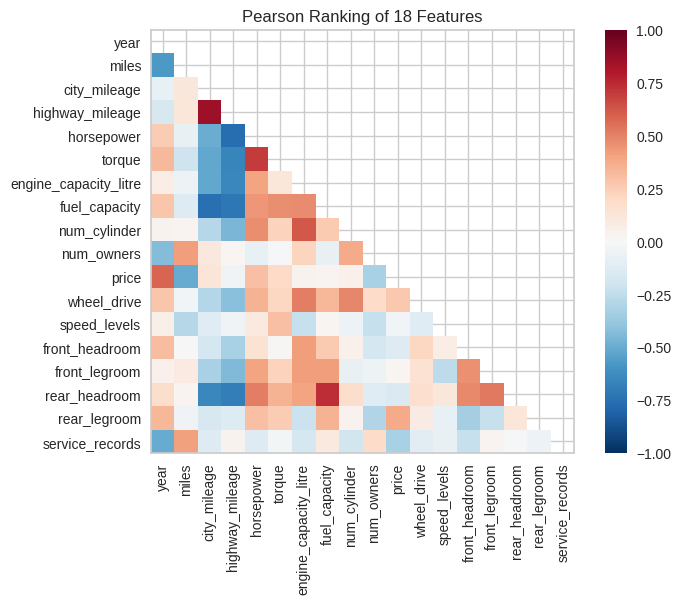

In [55]:
# mapa de correlação entre as variáveis quantitativas
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(data_quanti)
visualizer.show();

#### Spearman - Mapa de Calor

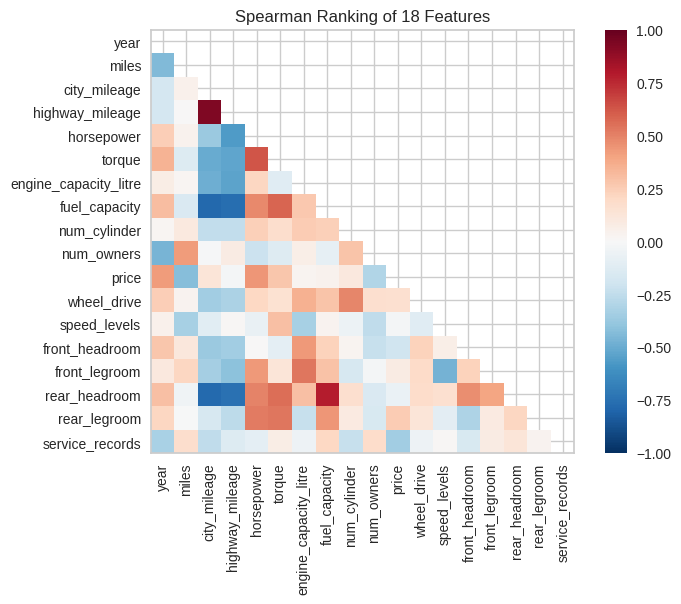

In [69]:
visualizer = Rank2D(algorithm="spearman")
visualizer.fit_transform(data_quanti)
visualizer.show();

#### Pearson - Matriz

In [56]:
# para facilitar a visualização das correlações
show(data_quanti.corr())

#### Spearman - Matriz

In [71]:
show(data_quanti.corr(method='spearman'))

#### Identificação de alta correlação entre colunas

In [75]:
# método para verificar se existem colunas altamente correlacionadas (corr > 0.95)
def correlated_cols(data_frame, method='pearson', threshold=0.95)->pd.DataFrame:
    return(data_frame
           .corr(method=method)
           .pipe(lambda df1: pd.DataFrame(np.tril(df1,k=-1), columns=df1.columns, index=df1.columns)
                 .stack()
                 .rename("pearson")
                 .pipe(lambda s: s[s.abs() > threshold].reset_index())
           .query('level_0 not in level_1'))
           )
           
show(correlated_cols(data_quanti))
show(correlated_cols(data_quanti, method='spearman'))
# como a análise de correlação não mostra nenhuma coluna com alto grau de correlação, por este critério, nenhuma coluna será removida

#### Correlação em relação ao preço (_price_)

In [96]:
# considerando que o modelo de regressão tomará como variável dependente o preço:
pd.concat([data_quanti
           .corr(method='pearson').T['price']
           .rename('price_pearson'), 
           data_quanti.corr(method='spearman').T['price']
           .rename('price_spearman')
           ],axis=1)

price_pearson  price_spearman
year                        0.581254        0.422279
miles                      -0.500769       -0.422115
city_mileage                0.131767        0.130069
highway_mileage            -0.041956       -0.018260
horsepower                  0.301800        0.441824
torque                      0.199764        0.278798
engine_capacity_litre       0.038197        0.030322
fuel_capacity               0.027480        0.044572
num_cylinder                0.049216        0.107307
num_owners                 -0.327853       -0.302198
price                       1.000000        1.000000
wheel_drive                 0.268273        0.163509
speed_levels               -0.038262       -0.022684
front_headroom             -0.129595       -0.198376
front_legroom               0.015819        0.082428
rear_headroom              -0.145403       -0.063653
rear_legroom                0.377287        0.253597
service_records            -0.327306       -0.347749

### Anaĺise conjunta -  variáveis qualitativas e quantitativas

In [127]:
data.columns.__len__()

22

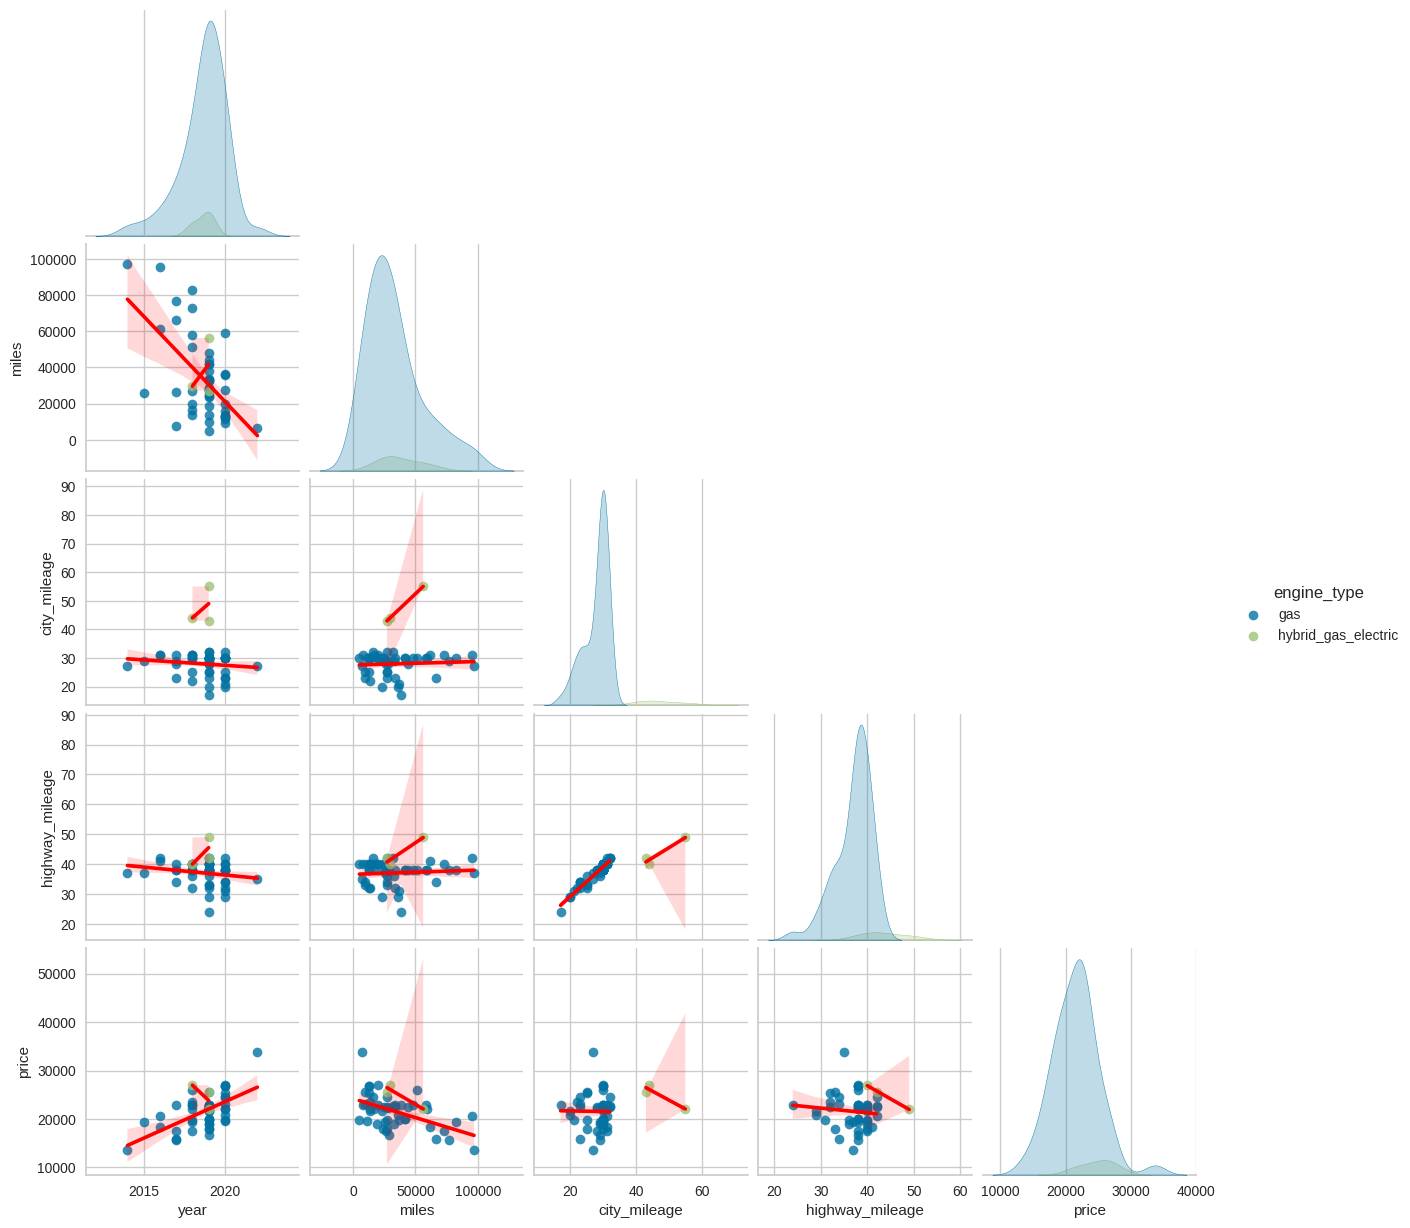

In [125]:
from seaborn import pairplot
vars = data_quanti.columns[0:4]
vars = vars.append(pd.core.indexes.base.Index([data_quanti.columns[10]])) 
newdf = data_quanti.copy()
newdf['engine_type'] = data_quali['engine_type']
p = pairplot(newdf, hue= 'engine_type',vars=vars,  kind='reg',corner=True, height=2.5, aspect=1, plot_kws={'line_kws':{'color':'red'}});  


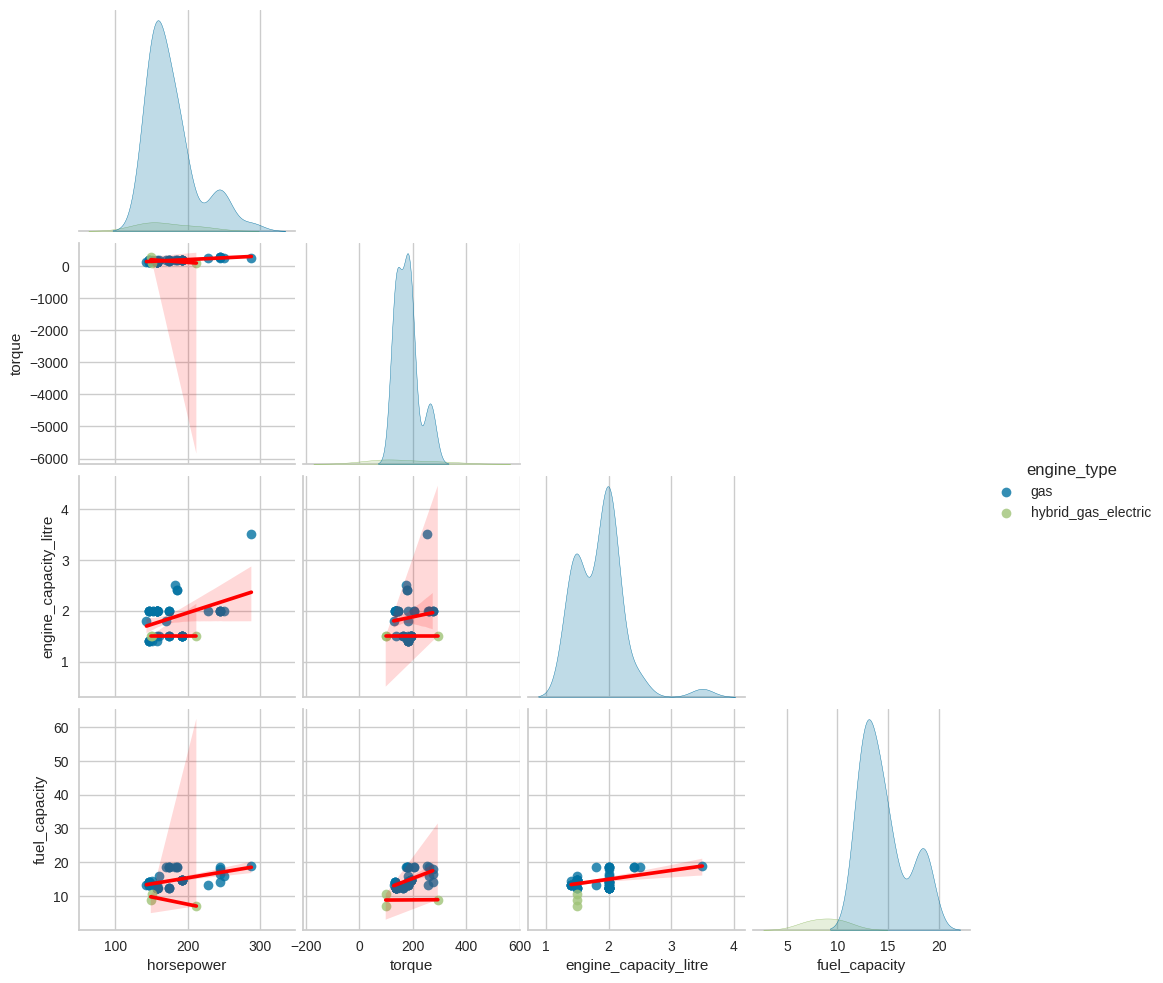

In [98]:
vars = data_quanti.columns[4:8] 
vars = vars.append(pd.core.indexes.base.Index([data_quanti.columns[10]])) 
newdf = data_quanti.copy()
newdf['engine_type'] = data_quali['engine_type']
p = pairplot(newdf, hue= 'engine_type',vars=vars,  kind='reg',corner=True, height=2.5, aspect=1, plot_kws={'line_kws':{'color':'red'}});  

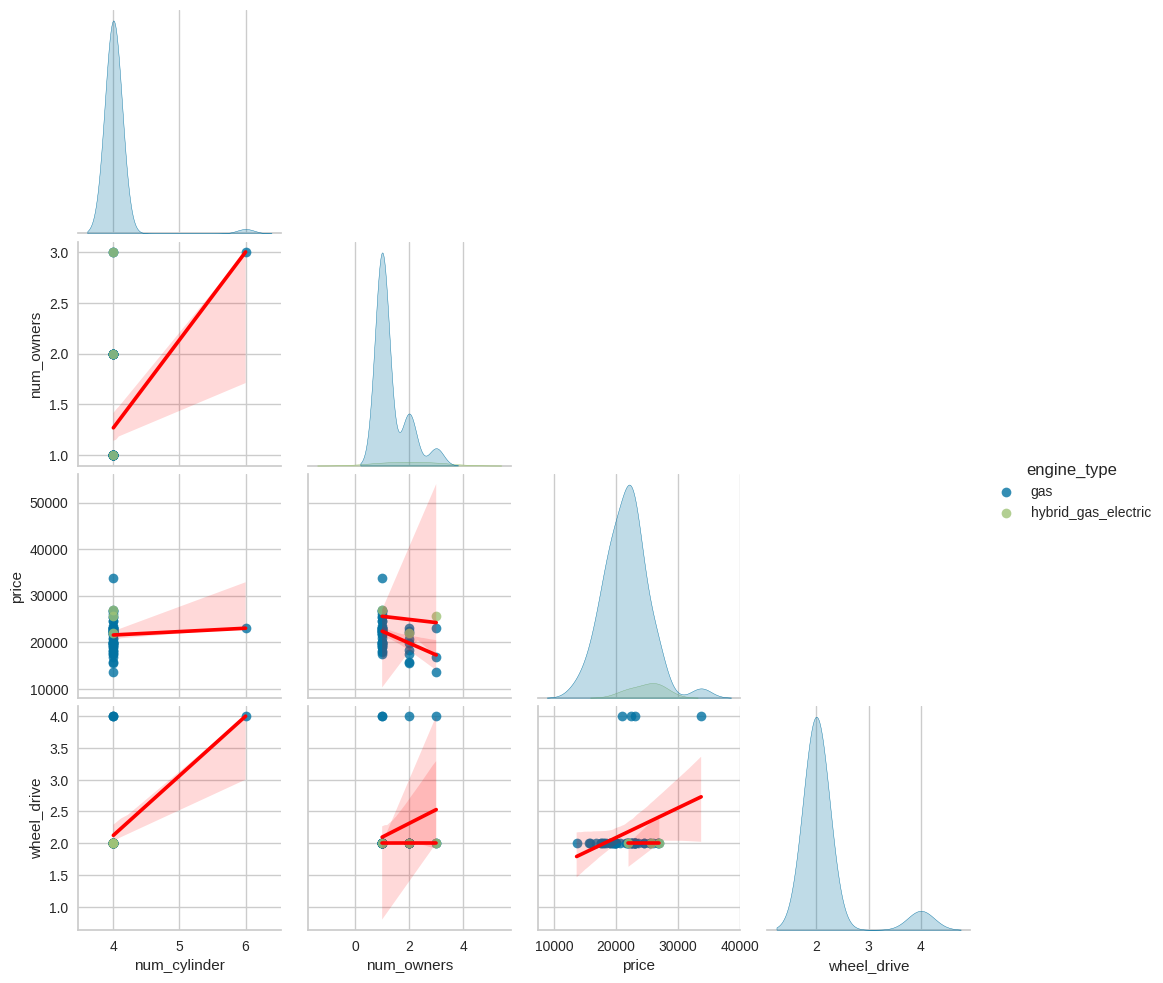

In [126]:
vars = data_quanti.columns[8:12]
newdf = data_quanti.copy()
newdf['engine_type'] = data_quali['engine_type']
p = pairplot(newdf, hue= 'engine_type',vars=vars,  kind='reg',corner=True, height=2.5, aspect=1, plot_kws={'line_kws':{'color':'red'}});  